In [33]:
from sklearn import datasets, model_selection, naive_bayes
import pandas as pd


# loading data
digits = datasets.load_digits()
X_d = digits.data
y_d = digits.target

cancer = datasets.load_breast_cancer()
X_c = cancer.data
y_c = cancer.target


print(X_d[:2])
print(X_c[:2])

[[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
  15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
   0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
   0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
 [ 0.  0.  0. 12. 13.  5.  0.  0.  0.  0.  0. 11. 16.  9.  0.  0.  0.  0.
   3. 15. 16.  6.  0.  0.  0.  7. 15. 16. 16.  2.  0.  0.  0.  0.  1. 16.
  16.  3.  0.  0.  0.  0.  1. 16. 16.  6.  0.  0.  0.  0.  1. 16. 16.  6.
   0.  0.  0.  0.  0. 11. 16. 10.  0.  0.]]
[[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
  1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
  6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
  1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
  4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 1.326e+03 8.474e-02 7.864e-02 8.690e-02
  7.017e-02 1.812e-01 5.667e-02 5.435e-01 7.339e-01 3.398e+00 7.408e+01
  5.225e-03 1.

In [48]:
print(digits['DESCR'])

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [49]:
print(cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

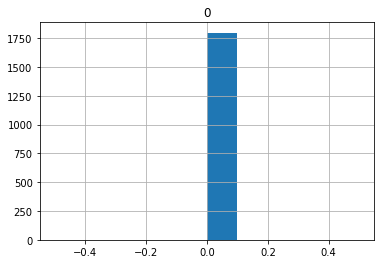

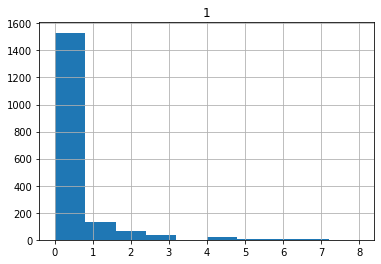

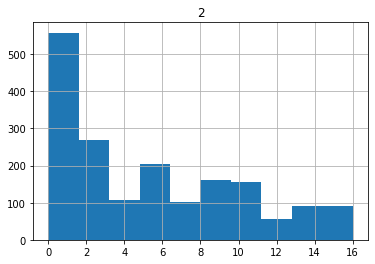

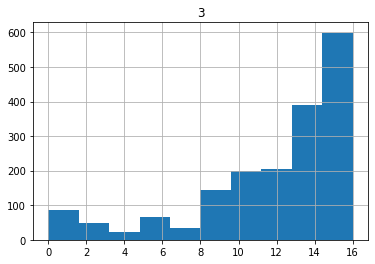

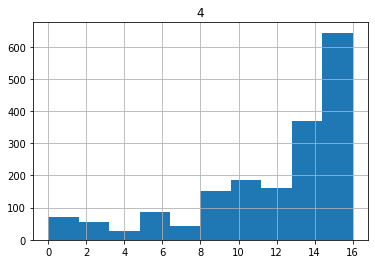

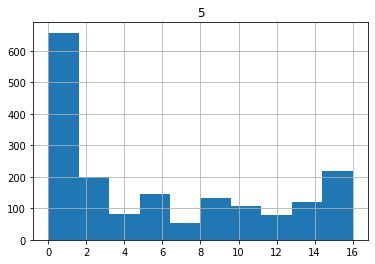

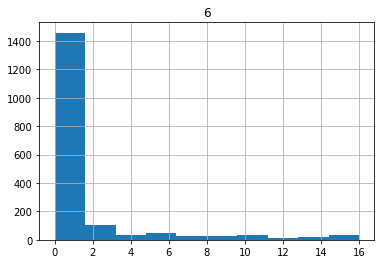

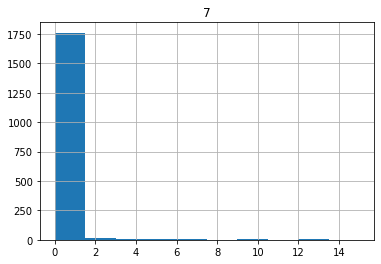

In [53]:
for column in pd.DataFrame(X_d).columns[:8]:
    pd.DataFrame(X_d)[[column]].hist()

In [47]:
# creating naive Bayes classifiers

mul = naive_bayes.MultinomialNB()
ber = naive_bayes.BernoulliNB()
gau = naive_bayes.GaussianNB()


# cross-validation

ber_d_score = model_selection.cross_val_score(ber, X_d, y_d)
ber_c_score = model_selection.cross_val_score(ber, X_c, y_c)

mul_d_score = model_selection.cross_val_score(mul, X_d, y_d)
mul_c_score = model_selection.cross_val_score(mul, X_c, y_c)

gau_d_score = model_selection.cross_val_score(gau, X_d, y_d)
gau_c_score = model_selection.cross_val_score(gau, X_c, y_c)



print('--- Digits ---')
print('BernoulliNB mean cross_val_score:', ber_d_score.mean())
print('MultinomialNB mean cross_val_score:', mul_d_score.mean())
print('GaussianNB mean cross_val_score:', gau_d_score.mean())
print('')
print('--- Breast cancer ---')
print('BernoulliNB mean cross_val_score:', ber_c_score.mean())
print('MultinomialNB mean cross_val_score:', mul_c_score.mean())
print('GaussianNB mean cross_val_score:', gau_c_score.mean())

--- Digits ---
BernoulliNB mean cross_val_score: 0.8241736304549674
MultinomialNB mean cross_val_score: 0.8703497369235531
GaussianNB mean cross_val_score: 0.8069281956050759

--- Breast cancer ---
BernoulliNB mean cross_val_score: 0.6274181027790716
MultinomialNB mean cross_val_score: 0.8963204471355379
GaussianNB mean cross_val_score: 0.9385188635305075
